# Question 1:  Is there a correlation between budget and Revenue?

### Findings:
With a correlation coefficient of 0.75, there is a strong relationship between budget and revenue. It is also interesting to note that this relationship has strengthened throughout the last 4 decades. Going from 0.36 in 1980s to 0.90 in the 2010s!!

### Reccomendations:
Given this information, it is clear that the key is to spend spend spend when it comes to revenue generation, up to a point, where diminishing returns are likely to be seen

# Work

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../cleandata/movierevenue.csv',index_col = 0)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,4,12,5.532577,0.846921,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,4,5,1.546673,0.607331,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,4,6,-0.572108,-1.337036,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,4,5,3.243841,0.764364,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,4,12,3.153696,0.759251,999721747


In [3]:
corr = df.corr()['production_budget']['worldwide_gross']

print(f" The Correlation Coefficient between Production budget and world wide gross is: {corr}")
# Can see that budget and worldwide gross are relatively highly correlated

 The Correlation Coefficient between Production budget and world wide gross is: 0.7483059765694665


Checking distribution of the data

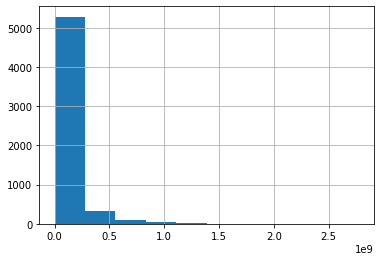

In [5]:
df['worldwide_gross'].hist()

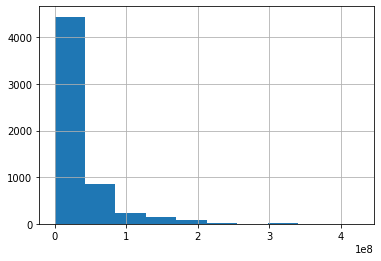

In [6]:
df['production_budget'].hist()

# Investigating How to graph the relationship

Text(0, 0.5, 'Worldwide Gross in Billions of USD')

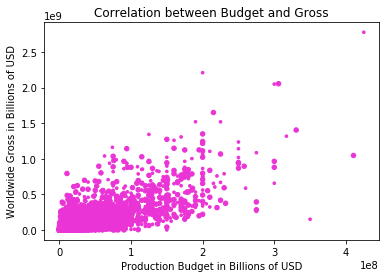

In [7]:
plt.scatter(x = 'production_budget', y = 'worldwide_gross', data= df, marker = 'o', color = "#eb34d5",s = (7,20))
plt.title('Correlation between Budget and Gross')
plt.xticks()
plt.xlabel('Production Budget in Billions of USD')
plt.ylabel('Worldwide Gross in Billions of USD')

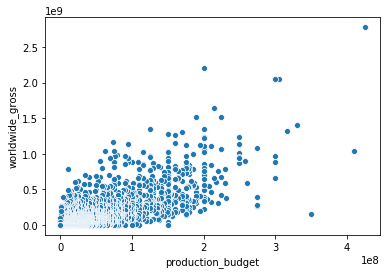

In [8]:
sns.scatterplot(x = 'production_budget', y='worldwide_gross', data = df)

Text(0, 0.5, 'Gross Revenue in Billions (USD)')

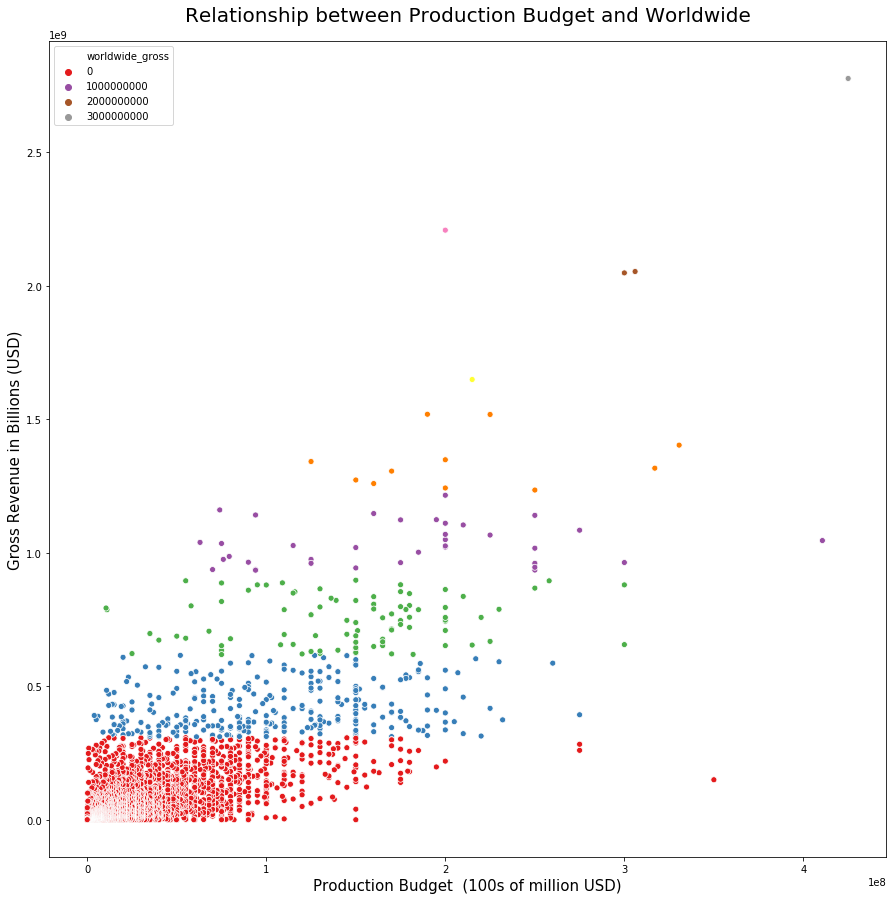

In [9]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="production_budget", y="worldwide_gross",hue = "worldwide_gross",
                     data=df, palette="Set1")


ax.set_title("Relationship between Production Budget and Worldwide", size = 20, pad = 20)
ax.set_xlabel("Production Budget  (100s of million USD)", size = 15)
ax.set_ylabel("Gross Revenue in Billions (USD)", size = 15)

# Graph showing correlation coefficient and regression

Text(0, 0.5, 'Gross Revenue in Billions (USD)')

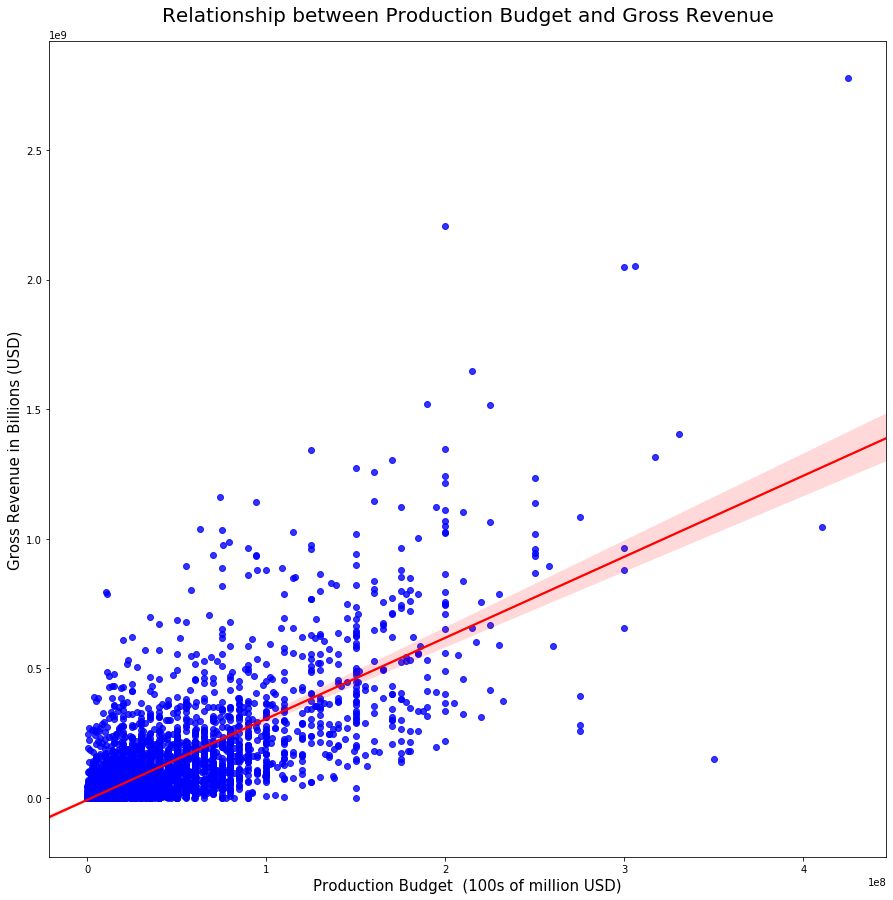

In [627]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax = sns.regplot(x="production_budget", y="worldwide_gross",data=df, 
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})


ax.set_title("Relationship between Production Budget and Gross Revenue", size = 20, pad = 20)
ax.set_xlabel("Production Budget  (100s of million USD)", size = 15)
ax.set_ylabel("Gross Revenue in Billions (USD)", size = 15)

**After looking through the data, I found that some movie's had the same name - to avoid the different movies being included when grouping by movie name I will create a new column that combines movie name and release data**

In [553]:
df['movie_check'] = df['movie']+' '+df['release_date']

# Exploring How Budgets and Revenues have changed over the decades

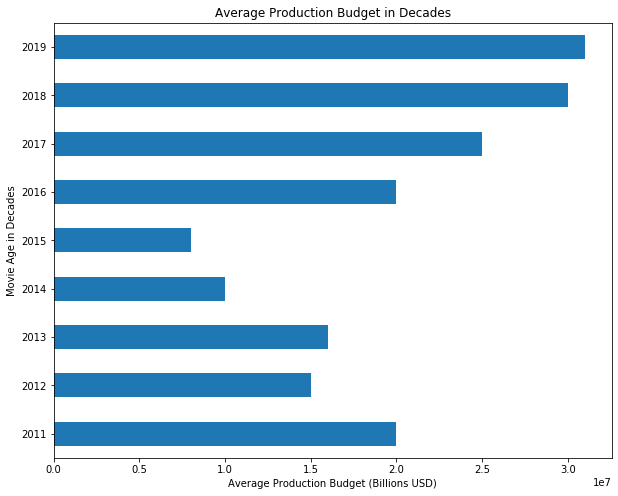

In [674]:
to_plot = df2010.groupby('year_released')['production_budget'].median()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('Movie Age in Decades')
plt.xlabel('Average Production Budget (Billions USD)')
plt.title('Average Production Budget in Decades');

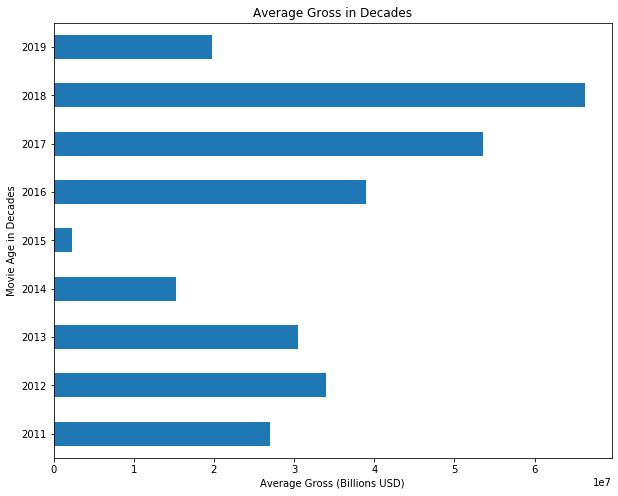

In [675]:
to_plot2 = df2010.groupby('year_released')['worldwide_gross'].median()
to_plot2.plot(kind='barh', figsize=(10,8))
plt.ylabel('Movie Age in Decades')
plt.xlabel('Average Gross (Billions USD)')
plt.title('Average Gross in Decades');

In [657]:
years = df2010.groupby('year_released')['worldwide_gross'].median()


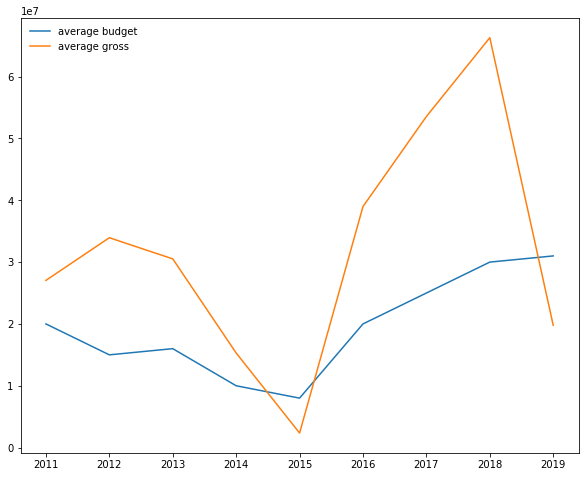

In [684]:
new_figure = plt.figure(figsize = (10,8))

# Add a subplot to the figure - a new axes
ax = new_figure.add_subplot(111)

ax.plot(to_plot, label = 'average budget')
ax.plot(to_plot2, label = 'average gross')
ax.legend(loc='upper left', frameon=False)




# Creating a data frame for the 4 decades we will analyse

In [587]:
df4decades = df.loc[(df['decades']== 0) |(df['decades']== 1) | (df['decades']== 2)| (df['decades']== 3)]
df4decades.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,4,Avatar 2009-12-18
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875,4,Pirates of the Caribbean: On Stranger Tides 20...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,6,-0.572108,-1.337036,-200237650,4,Dark Phoenix 2019-06-07
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963,4,Avengers: Age of Ultron 2015-05-01
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,12,3.153696,0.759251,999721747,4,Star Wars Ep. VIII: The Last Jedi 2017-12-15


In [588]:
df4decades.loc[(df4decades['decades'] == 0), 'decades'] = '2010s'
df4decades.loc[(df4decades['decades'] == 1), 'decades'] = '2000s'
df4decades.loc[(df4decades['decades'] == 2), 'decades'] = '1990s'
df4decades.loc[(df4decades['decades'] == 3), 'decades'] = '1980s'




/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [589]:
df4decades.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,2000s,Friday,12,5.532577,0.846921,2351345279,4,Avatar 2009-12-18
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,2010s,Friday,5,1.546673,0.607331,635063875,4,Pirates of the Caribbean: On Stranger Tides 20...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,2010s,Friday,6,-0.572108,-1.337036,-200237650,4,Dark Phoenix 2019-06-07
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,2010s,Friday,5,3.243841,0.764364,1072413963,4,Avengers: Age of Ultron 2015-05-01
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,2010s,Friday,12,3.153696,0.759251,999721747,4,Star Wars Ep. VIII: The Last Jedi 2017-12-15


In [596]:
# Storing Data frame to use in other questions

In [597]:
%store df4decades


Stored 'df4decades' (DataFrame)


In [598]:
print(f"The average Production budget in 1980s is: {df1980['production_budget'].median()}")
print(f"The average Production budget in 1990s is: {df1990['production_budget'].median()}")
print(f"The average Production budget in 2000s is: {df2000['production_budget'].median()}")
print(f"The average Production budget in 2010s is: {df2010['production_budget'].median()}")


The average Production budget in 1980s is: 12000000.0
The average Production budget in 1990s is: 22000000.0
The average Production budget in 2000s is: 20000000.0
The average Production budget in 2010s is: 17000000.0


In [599]:
print(f"The average Worldwide Gross in 1980s is: {df1980['worldwide_gross'].median()}")
print(f"The average Worldwide Gross in 1990s is: {df1990['worldwide_gross'].median()}")
print(f"The average Worldwide Gross in 2000s is: {df2000['worldwide_gross'].median()}")
print(f"The average Worldwide Gross in 2010s is: {df2010['worldwide_gross'].median()}")


The average Worldwide Gross in 1980s is: 26496790.0
The average Worldwide Gross in 1990s is: 30384900.0
The average Worldwide Gross in 2000s is: 29202213.0
The average Worldwide Gross in 2010s is: 29204379.0


In [600]:
print(f"The average Worldwide Gross in 1980s is: {df1980['worldwide_gross'].sum()}")
print(f"The average Worldwide Gross in 1990s is: {df1990['worldwide_gross'].sum()}")
print(f"The average Worldwide Gross in 2000s is: {df2000['worldwide_gross'].sum()}")
print(f"The average Worldwide Gross in 2010s is: {df2010['worldwide_gross'].sum()}")


The average Worldwide Gross in 1980s is: 21414092749
The average Worldwide Gross in 1990s is: 81434489314
The average Worldwide Gross in 2000s is: 190955329531
The average Worldwide Gross in 2010s is: 221262113807


# Creating DataFrames for each decade I will analyse

In [605]:
df2010 = df.loc[(df['decades']==0) & (df['year_released']!= 2020)]

In [618]:
df2010.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875,4,Pirates of the Caribbean: On Stranger Tides 20...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,6,-0.572108,-1.337036,-200237650,4,Dark Phoenix 2019-06-07
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963,4,Avengers: Age of Ultron 2015-05-01
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,12,3.153696,0.759251,999721747,4,Star Wars Ep. VIII: The Last Jedi 2017-12-15
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,5,0,Friday,12,5.710167,0.850972,1747311220,4,Star Wars Ep. VII: The Force Awakens 2015-12-18


In [607]:
df2000 = df.loc[(df['decades']==1)]

In [617]:
df2000.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,4,Avatar 2009-12-18
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,2007,13,1,Thursday,5,2.211401,0.688609,663420425,3,Pirates of the Caribbean: At Worldâs End 200...
14,15,2010-11-24,Tangled,260000000,200821936,586477240,2010,10,1,Wednesday,11,1.255682,0.556675,326477240,2,Tangled 2010-11-24
15,16,2007-05-04,Spider-Man 3,258000000,336530303,894860230,2007,13,1,Friday,5,2.468451,0.711687,636860230,4,Spider-Man 3 2007-05-04
19,20,2009-07-15,Harry Potter and the Half-Blood Prince,250000000,302089278,935213767,2009,11,1,Wednesday,7,2.740855,0.732681,685213767,2,Harry Potter and the Half-Blood Prince 2009-07-15


In [610]:
df1990 = df.loc[(df['decades']==2)]

In [611]:
df1990.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,23,2,Friday,12,10.041042,0.909429,2008208395,4,Titanic 1997-12-19
106,7,1999-06-30,Wild Wild West,175000000,113805681,221229335,1999,21,2,Wednesday,6,0.264168,0.208966,46229335,2,Wild Wild West 1999-06-30
109,10,1995-07-28,Waterworld,175000000,88246220,264246220,1995,25,2,Friday,7,0.509978,0.337739,89246220,4,Waterworld 1995-07-28
199,100,1999-06-16,Tarzan,145000000,171091819,448191819,1999,21,2,Wednesday,6,2.090978,0.676478,303191819,2,Tarzan 1999-06-16
207,8,1998-07-01,Armageddon,140000000,201578182,554600000,1998,22,2,Wednesday,7,2.961429,0.747566,414600000,2,Armageddon 1998-07-01


In [613]:
df1980 =df.loc[(df['decades']==3)]

In [614]:
df1980.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
695,96,1988-06-22,Who Framed Roger Rabbit?,70000000,154112492,351500000,1988,32,3,Wednesday,6,4.021429,0.800853,281500000,2,Who Framed Roger Rabbit? 1988-06-22
702,3,1990-07-03,Die Hard 2,70000000,117323878,239814025,1990,30,3,Tuesday,7,2.425915,0.708107,169814025,1,Die Hard 2 1990-07-03
722,23,1989-08-09,The Abyss,70000000,54243125,54243125,1989,31,3,Wednesday,8,-0.225098,-0.290486,-15756875,2,The Abyss 1989-08-09
779,80,1990-06-01,Total Recall,65000000,119394839,261400000,1990,30,3,Friday,6,3.021538,0.751339,196400000,4,Total Recall 1990-06-01
864,65,1990-06-27,Days of Thunder,60000000,82670733,157670733,1990,30,3,Wednesday,6,1.627846,0.619460,97670733,2,Days of Thunder 1990-06-27


In [620]:
# Checking Correlation

In [615]:
print(f"Correlation in 1980s is: {df1980.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 1990s is: {df1990.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2000s is: {df2000.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2010s is: {df2010.corr()['worldwide_gross']['production_budget']}")

Correlation in 1980s is: 0.36036976366148676
Correlation in 1990s is: 0.581093385584478
Correlation in 2000s is: 0.7579313686666304
Correlation in 2010s is: 0.7973745361056639


In [619]:
# Saving DFs

In [616]:
%store df1980
%store df1990
%store df2000
%store df2010

Stored 'df1980' (DataFrame)
Stored 'df1990' (DataFrame)
Stored 'df2000' (DataFrame)
Stored 'df2010' (DataFrame)


It is clear to see the trend in the correlation between worldwide gross and production budget has become more prominant over the past 4 decades





In [464]:
df.corr()['worldwide_gross']['production_budget']

0.7483059765694665

# Different Scatter Plot's to represent the correlation

## Regression plot

Text(0, 0.5, 'Worldwide Gross (in Billions USD)')

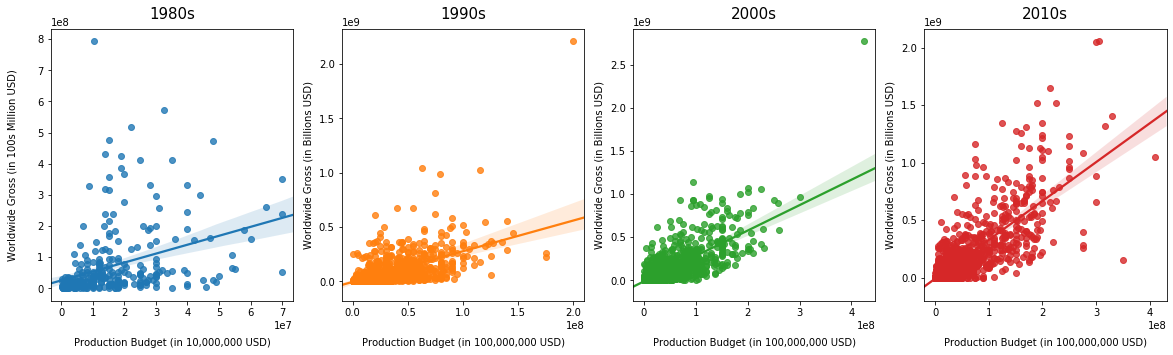

In [623]:
new_figure = plt.figure(figsize=(20,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)

sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df1980, ax = ax1)
sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df1990, ax = ax2)
sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df2000, ax = ax3)
sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df2010, ax = ax4)

ax1.set_title('1980s', size = 15, pad = 10)
ax2.set_title('1990s', size = 15, pad = 10)
ax3.set_title('2000s', size = 15, pad = 10)
ax4.set_title('2010s', size = 15, pad = 10)

ax1.set_xlabel('Production Budget (in 10,000,000 USD)',labelpad = 20)
ax2.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax3.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax4.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)

ax1.set_ylabel('Worldwide Gross (in 100s Million USD)',labelpad = 20)
ax2.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax3.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax4.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)


In [482]:
print(f"Correlation in 1980s is: {df1980.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 1990s is: {df1990.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2000s is: {df2000.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2010s is: {df2010.corr()['worldwide_gross']['production_budget']}")

Correlation in 1980s is: 0.36036976366148676
Correlation in 1990s is: 0.581093385584478
Correlation in 2000s is: 0.7579313686666304
Correlation in 2010s is: 0.7973745361056639


## Scatter Plot

Text(0, 0.5, 'Worldwide Gross (in Billions USD)')

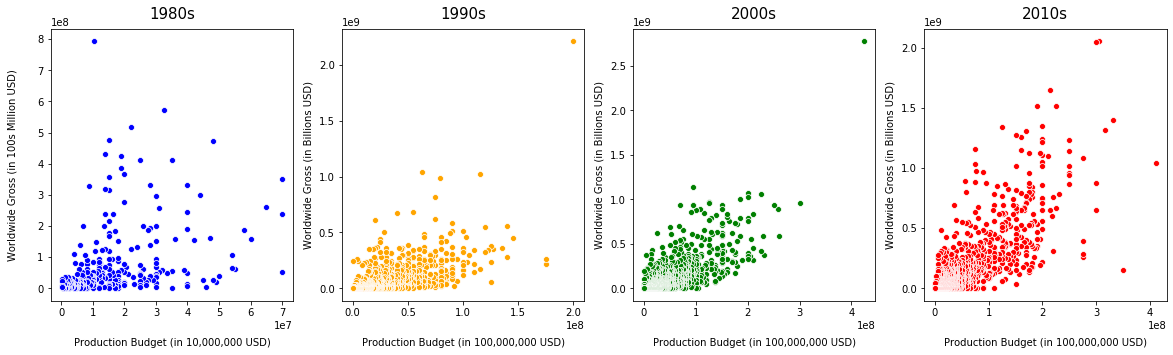

In [621]:
new_figure = plt.figure(figsize=(20,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)

sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df1980, ax = ax1,color = 'blue')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df1990, ax = ax2, color = 'orange')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df2000, ax = ax3, color = 'green')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df2010, ax = ax4, color = 'red')

ax1.set_title('1980s', size = 15, pad = 10)
ax2.set_title('1990s', size = 15, pad = 10)
ax3.set_title('2000s', size = 15, pad = 10)
ax4.set_title('2010s', size = 15, pad = 10)

ax1.set_xlabel('Production Budget (in 10,000,000 USD)',labelpad = 20)
ax2.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax3.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax4.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)

ax1.set_ylabel('Worldwide Gross (in 100s Million USD)',labelpad = 20)
ax2.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax3.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax4.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
